## K_means_Clustering
Author: Ejaz-ur-Rehman\
Date Created: 09-04-2025\
Email ID: ijazfinance@gmail.com

- K-means clustering is a popular unsupervised machine learning algorithm used to partition a dataset into K distinct clusters. The goal of the algorithm is to group similar data points together while keeping different clusters as separate as possible.

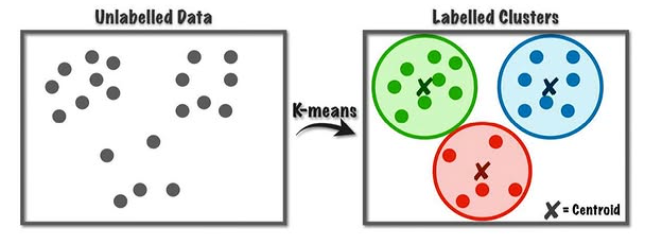

- The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

- The k-means algorithm divides a set of samples into disjoint clusters , each described by the mean  of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from which the data clusters are dense (see below). The k-means algorithm is a method of cluster analysis which aims to partition  n  observations into  k  clusters based on the mean distance of the samples, with each observation belonging to the cluster with the closest mean. The algorithm is commonly used in data mining and machine learning to identify patterns and relationships in data.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
# model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#import the data
X = df[['age', 'fare']]

# Impute missing values in 'age' with the mean
X['age'].fillna(X['age'].mean(), inplace=True)

# scaled the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform k-means clustering
model = KMeans(n_clusters=3)
model.fit(X_scaled)

#assign cluster labels to the data
df['cluster'] = model.labels_

C:\Users\DELL\AppData\Local\Temp\ipykernel_10636\134602743.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].mean(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10636\134602743.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].mean(), inplace=True)


In [38]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [39]:
df.cluster.unique()

array([0, 1, 2], dtype=int32)

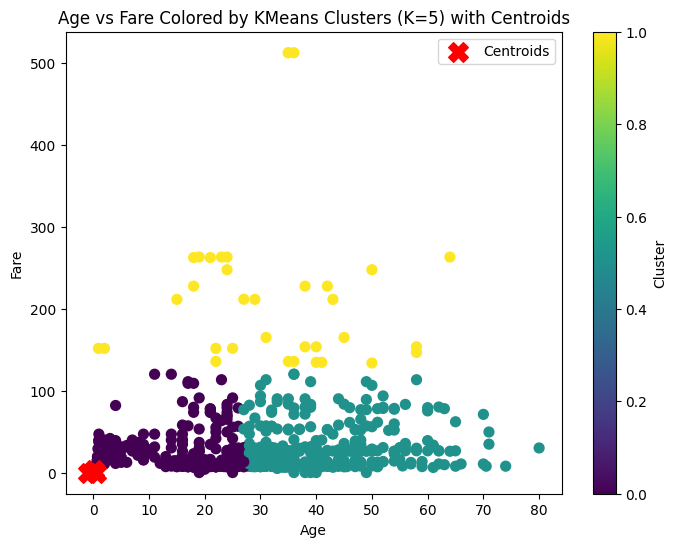

In [41]:
# Get the centroids of the clusters
centroids = model.cluster_centers_

# Now plot the clusters using Age and Fare as the axes
plt.figure(figsize=(8, 6))

# Scatter plot with Age vs Fare and coloring by the Cluster labels
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='viridis', s=50)

# Plot the centroids (using a different marker style and color)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Adding labels and title
plt.title('Age vs Fare Colored by KMeans Clusters (K=5) with Centroids')
plt.xlabel('Age')
plt.ylabel('Fare')

# Display the color bar to show the cluster mapping
plt.colorbar(label='Cluster')

# Adding a legend
plt.legend()

# Show the plot
plt.show()
